In [271]:
%matplotlib inline
import matplotlib.pyplot as plt
from pydataset import data
import pandas as pd

In [272]:
# 1. Use pandas to convert the following list to a numeric series:
# ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3',
# '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17',
# '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67',
# '$769,681.94', '$452,650.23']
dollar_list = ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3',
                '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39',
                '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54',
                '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

dollar_series = pd.Series(dollar_list).str.replace("$", "").str.replace(",", "")
dollar_series.astype("float")

In [273]:
# Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:
df_mpg = data('mpg')

#    - How many rows and columns are there? 234 rows × 11 columns
print("How many rows and columns are there?")
print(f"{df_mpg.shape[0]} x {df_mpg.shape[1]}")
print()

#    - What are the data types? float64(1), int64(4), object(6)
print("What are the data types?")
print(df_mpg.dtypes)
print()

#    - Do any cars have better city mileage than highway mileage?
print("Do any cars have better city mileage than highway mileage?")
any_better_city_than_highway = (df_mpg.cty > df_mpg.hwy).any()
print("Yes" if any_better_city_than_highway else "No")
print()

#    - Create a column named mileage_difference this column should contain the difference between
# highway and city mileage for each car.
print("Create a column named mileage_difference this column should contain "
      "the difference between highway and city mileage for each car.")
df_mileage_diff = df_mpg.assign(mileage_difference=df_mpg.hwy - df_mpg.cty)
print(df_mileage_diff[["mileage_difference"]])
print()

#    - On average, which manufacturer has the best miles per gallon? Honda
print("On average, which manufacturer has the best miles per gallon?")
# find the average mpg for each vehicle
# find the average mpg for each manufacturer
# print and sort by descending
df_avg_mpg = df_mpg.assign(average_mpg=(df_mpg.hwy + df_mpg.cty) / 2)
avg_mpg_by_manufacturer = df_avg_mpg.groupby(by="manufacturer")["average_mpg"].mean()
print(best_mpg_by_manufacturer.sort_values(ascending=False))
print()

#    - How many different manufacturers are there? 15
print("How many different manufacturers are there?")
print(df_mpg.manufacturer.nunique())
print()

#    - How many different models are there?
print("How many different models are there?")
print("Number of different models:", df_mpg.model.nunique())
print()

#    - Do automatic or manual cars have better miles per gallon? manual
print("Do automatic or manual cars have better miles per gallon?")
split_trans_list = [trans[0] for trans in df_avg_mpg.trans.str.split("(")]
df_avg_mpg_trans = df_avg_mpg.assign(generic_trans=split_trans_list)
print(df_avg_mpg_trans.groupby(by="generic_trans")["average_mpg"].mean().sort_values(ascending=False))
print()

How many rows and columns are there?
234 x 11

What are the data types?
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

Do any cars have better city mileage than highway mileage?
No

Create a column named mileage_difference this column should contain the difference between highway and city mileage for each car.
     mileage_difference
1                    11
2                     8
3                    11
4                     9
5                    10
6                     8
7                     9
8                     8
9                     9
10                    8
11                    8
12                   10
13                    8
14                    8
15                   10
16                    9
17                    8
18                    7


In [274]:
# Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:
df_mammals = data("Mammals")

#   - How many rows and columns are there? 107 rows x 4 columns
print("How many rows and columns are there?")
print(df_mammals.shape)
print()

#   - What are the data types? bool(2), float64(2)
print("What are the data types?")
print(df_mammals.dtypes)
print()

#   - What is the the weight of the fastest animal? 55.0 kg
print("What is the the weight of the fastest animal?")
print(df_mammals.loc[df_mammals["speed"].idxmax()]["weight"])
print()

#   - What is the overall percentage of specials? 9%
print("What is the overall percentage of specials?")
print(round((df_mammals.specials.sum() / df_mammals.specials.count()) * 100, 2))
print()

#   - How many animals are hoppers that are above the median speed? What percentage is this?
print("How many animals are hoppers that are above the median speed?")
median_speed = df_mammals["speed"].median()
df_hoppers = df_mammals[df_mammals.hoppers]
df_hoppers_above_median_speed = df_hoppers[df_hoppers.speed > median_speed]
print(len(df_hoppers_above_median_speed))
print()

print("What percentage is this?")
percentage_above_median = (len(df_hoppers_above_median_speed) / len(df_mammals)) * 100
print(round(percentage_above_median, 2))

How many rows and columns are there?
(107, 4)

What are the data types?
weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

What is the the weight of the fastest animal?
55.0

What is the overall percentage of specials?
9.35

How many animals are hoppers that are above the median speed?
7

What percentage is this?
6.54


In [275]:
# Getting data from SQL databases
from env import host, user, password
from sqlalchemy import create_engine

# Create a function named get_db_url. It should accept a username, hostname, password, and
# database name and return a url formatted like in the examples in this lesson.
def get_db_url(hostname: str, username: str, password: str, db_name: str) -> str:
    return f"mysql+pymysql://{username}:{password}@{hostname}/{db_name}"


# Use your function to obtain a connection to the employees database.
db_employees = "employees"
conn = create_engine(get_db_url(host, user, password, db_employees))

# Read the employees and titles tables into two separate data frames
query_employees_table = """
SELECT *
FROM employees
"""
df_employees = pd.read_sql(query_employees_table, conn)

query_titles_table = """
SELECT *
FROM titles
"""
df_titles = pd.read_sql(query_titles_table, conn)

Visualize the number of employees with each title.


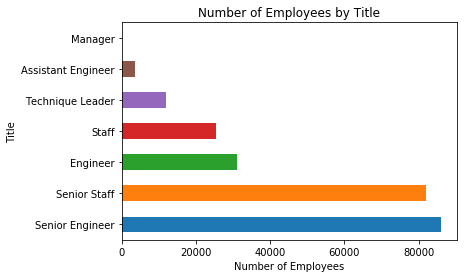

How many different titles has each employee had?


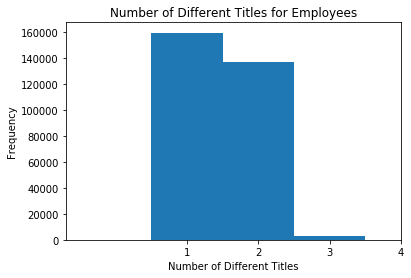

For each title, find the hire date of the employee that was hired most recently with that title.don't worry about title changes)
title
Assistant Engineer    2000-01-06
Engineer              1999-12-31
Senior Engineer       2000-01-08
Senior Staff          2000-01-23
Staff                 2000-01-11
Technique Leader      2000-01-03
Name: hire_date, dtype: object


In [276]:
import datetime

# Visualize the number of employees with each title.
print("Visualize the number of employees with each title.")
today_date = datetime.datetime.today().date()
df_titles_current = df_titles[df_titles.to_date > today_date]
df_titles_count = df_titles_current.title.value_counts()
df_titles_count.plot.barh()
plt.title("Number of Employees by Title")
plt.xlabel("Number of Employees")
plt.ylabel("Title")
plt.show()

# How many different titles has each employee had
print("How many different titles has each employee had?")
df_titles_per_employee = df_titles.groupby(by="emp_no")["title"].count()
df_titles_per_employee.plot.hist(bins=[0, 1, 2, 3, 4], xticks=(1, 2, 3, 4), align="left")
plt.title("Number of Different Titles for Employees")
plt.xlabel("Number of Different Titles")
plt.show()


# Use the .join method to join the employees and titles data frames together
df_employees_and_titles = df_employees.join(df_titles, on="emp_no", lsuffix="_emp")

# For each title, find the hire date of the employee that was hired most recently with that title.
# (don't worry about title changes)
print("For each title, find the hire date of the employee that was hired most recently with that title."
      "don't worry about title changes)")
df_hire_date_by_title = df_employees_and_titles.groupby(by="title")["hire_date"]
print(df_hire_date_by_title.max())


# BONUS: Visualize how frequently employees change titles.

# BONUS: find the hire date of the employee that was hired most recently with that title.
# (worry about title changes here; just target employees who were hired with the title)


In [277]:
# Explore the data from the chipotle database. Write a python script that will use this data to answer
# the following questions:
db_chipotle = "chipotle"
conn = create_engine(get_db_url(host, user, password, db_chipotle))

chipotle_query = """
SELECT *
FROM orders;
"""
df_chipotle = pd.read_sql(chipotle_query, conn)

In [278]:
# What is the total price for each order?
print("What is the total price for each order?")
chipotle_float_price = df_chipotle.item_price.str.replace("$", "").replace(",", "")
df_chipotle_float_price = df_chipotle.assign(float_price=pd.to_numeric(chipotle_float_price))
print(df_chipotle_float_price.groupby(by="order_id")["float_price"].sum())
print()

# What are the most popular 3 items?
print("What are the most popular 3 items?")
df_quantity_by_item = df_chipotle.groupby(by="item_name")["quantity"]
df_quantity_items_sold = df_quantity_by_item.sum()
print(df_quantity_items_sold.sort_values(ascending=False)[:3])
print()

# Which item has produced the most revenue?
print("Which item has produced the most revenue?")
df_quantity_and_price_by_item = df_chipotle_float_price.groupby(by="item_name").agg({"float_price": "sum"})
print(df_quantity_and_price_by_item[df_quantity_and_price_by_item.float_price == df_quantity_and_price_by_item.float_price.max()])

What is the total price for each order?
order_id
1        11.56
2        16.98
3        12.67
4        21.00
5        13.70
6        17.50
7        15.70
8        10.88
9        10.67
10       13.20
11       12.38
12       14.37
13       10.88
14       10.08
15       10.88
16       10.68
17       10.08
18       24.90
19       13.90
20       36.20
21       23.36
22       12.98
23       11.17
24       12.07
25       11.38
26       20.50
27       13.90
28       33.70
29       17.98
30       23.36
31       10.68
32       12.98
33       13.20
34       28.40
35       13.40
36       18.00
37       18.00
38       18.57
39       12.20
40       32.75
41       16.20
42       13.70
43       20.50
44       13.20
45       21.97
46       11.88
47       10.08
48       13.70
49       16.15
50       10.88
51       18.57
52       12.98
53       22.45
54       15.70
55       10.08
56       16.65
57       16.20
58       10.88
59       10.98
60       22.50
61       16.20
62       15.70
63       15.70
64    